In [302]:
%load_ext autoreload
%autoreload 2
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
from scipy.stats import multivariate_normal
from clustering.gmm.gmm import Gmm
from sklearn.mixture import GaussianMixture
from ipywidgets import interact
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [162]:
def plot_pdf_2d(X,means,covs):
    if X.shape[1]!=2:
        return
    x=np.arange(X[:,0].min()-1,X[:,0].max()+1,step=0.01)    
    y=np.arange(X[:,1].min()-1,X[:,1].max()+1,step=0.01)
    x,y=np.meshgrid(x,y)
    xy=np.array([x.ravel(),y.ravel()]).T
    plt.figure(figsize=(10,10))
    plt.scatter(X[:, 0], X[:, 1], 0.8)
    for i in range(means.shape[0]):
        z=multivariate_normal(means[i],covs[i]).pdf(xy).reshape(x.shape)
        plt.contour(x, y, z)

In [163]:
components=3
random_state=0
X,Y = make_blobs(cluster_std=1,random_state=random_state,n_samples=500,centers=components)
X = np.dot(X,np.random.RandomState(0).randn(2,2))

### Sklearn GMM

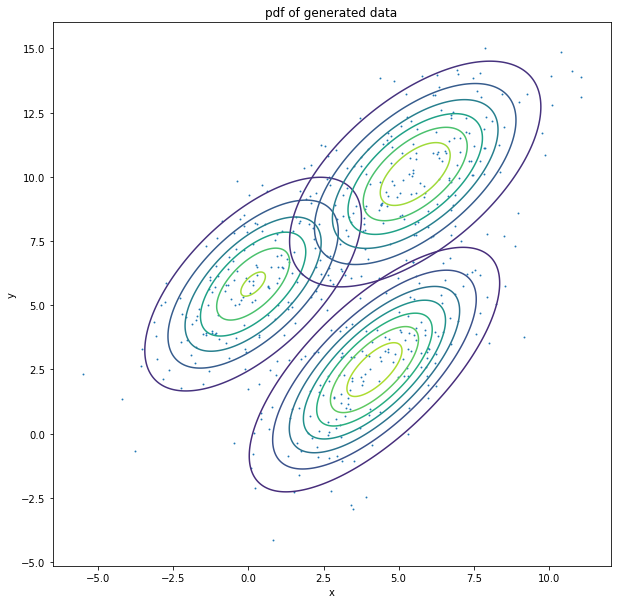

In [164]:
gmm_sklearn=GaussianMixture(n_components=components)
gmm_sklearn.fit(X)
plot_pdf_2d(X,gmm_sklearn.means_,gmm_sklearn.covariances_);
plt.title('pdf of generated data');
plt.xlabel('x');
plt.ylabel('y');

### Custom GMM

In [305]:
mean_history=[]
cov_history=[]
ll_history=[]
def log_progress(data):
    mean_history.append(data['mean'])
    cov_history.append(data['covariance'])
    ll_history.append(data['current_ll'])
gmm=Gmm(components=components,max_iter=1000,convergence_delta=1e-3,covariance_init='identity',mean_init='kmeans++',iteration_callback=log_progress)
gmm.fit(X)

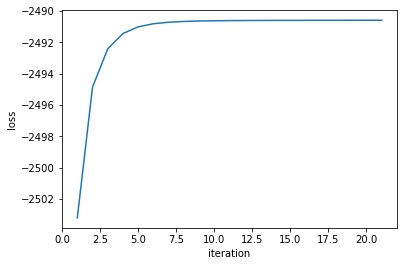

In [306]:
plt.plot(ll_history)
plt.xlabel('iteration')
plt.ylabel('loss');

In [307]:
@interact(i=(0,len(mean_history)-1,1))
def plot_custom_by_iteration(i):
    plot_pdf_2d(X,mean_history[i],cov_history[i]);
    plt.title('pdf of generated data');
    plt.xlabel('x');
    plt.ylabel('y');
    plt.show();

interactive(children=(IntSlider(value=10, description='i', max=21), Output()), _dom_classes=('widget-interact'…